Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos
<br>

<center>
    <h2> Tarea 3 </h2>
    <h1> GMM y KNN </h1>
    <p>
        Profesor Marcelo Mendoza<br>
        Segundo Semestre 2023<br>    
        Fecha de entrega: Viernes 29 de Septiembre
    </p>
    <br>
</center>

<br>


## Indicaciones

Deberás entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas.

**IMPORTANTE**:
- Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas. Es decir, si tienes un código perfecto pero este no es explicado o no se responden preguntas asociadas a este, no se tendrá el puntaje completo.
- El notebook debe tener todas las celdas de código ejecutadas. Cualquier notebook que no las tenga no podrá ser corregido.
- El carácter de esta tarea es **INDIVIDUAL**. Cualquier instancia de copia resultará en un 1,1 como nota de curso.
- En el caso de que se encuentren con problemas al correr celdas por el tamaño del dataset, esta permitido trabajar con una muestra representativa de este, siempre explicitando y justificando sus deciciones.

---


## Librerías

In [2]:
##Importa acá las librerias que vayas a utilizar
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import plotly.express as px
from sklearn.mixture import GaussianMixture
import matplotlib.cm as cm

#Seed

In [3]:
from random import seed

seed(2433)
#No cambiar la seed ya que se usara para su recorrecion

# Parte 1: Carga y Preprocesamiento (10 puntos)

## 1.1 Carga de datos (2 puntos)

Para esta tarea deberás trabajar con el dataset que está en Canvas.

In [27]:
digits = pd.read_csv('digits.csv')

## 1.2 Descripcion del Dataset (4 puntos)



#### ¿Qué representa cada fila en el dataset entregado? (2 puntos)

RESPUESTA:


In [28]:
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


👉🏻 En base al dataset **digits** entregado, podemos decir que cada fila representa una imagen de un digito (entre 0 y 9, inclusive), y todas las columnas, excepto label, contienen la informacion de la imagen del digito en cuestion (ubicado en la columna _label_). 

En resumen, las columnas pixel-0 a pixel-783 contienen la informacion de la imagen del digito, y la columna label contiene el digito al que corresponde la imagen.


#### ¿Es posible en este dataset eliminar columnas sin afectar de manera significativa los datos? ¿Por qué? (2 puntos)

REPUESTA:

👉🏻 Diria que no seria posible eliminar columnas sin afectar de manera significativa los datos para todos los casos. Ya que, en base al dataset entregado, tenemos que cada digito es representado por una imagen que contiene 784 pixeles, es decir, el digito se podria representar en una imagen de 28x28 pixeles. Por lo tanto, la eliminacion de un pixel podria afectar en la prediccion de un digito dentro de un modelo predictivo. Por ejemplo para el digito 8, podria ocurrir un caso critico en donde se elimina el pixel cuya ubicacion se encuentra justamente en la "interseccion" de los dos circulos que conforman el digito 8, y por lo tanto, el modelo podria predecir que el digito es un 0, ya que no se encuentra el pixel que "une" los dos circulos.

## 1.3 Determina si existen datos nulos. En caso de que existan, eliminalos del dataset. (2 puntos)

RESPUESTA:

In [29]:
digits[digits.isnull().any(axis=1)] 
# Podemos verificar que ninguna fila tiene valores nulos

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783


## 1.4 Manejo del Dataset (2 puntos)
Normaliza los valores de las columnas del dataset. ¿Por qué esto es importante?

RESPUESTA:

In [30]:
y = digits['label'] # Guardamos el vector de etiquetas como variable de respuesta
digits.drop(columns=['label'], inplace=True) # Eliminamos la columna de etiquetas del dataset
X = digits # Nuevo data-set sin la columna de etiquetas


In [46]:
# Normalizaremos los datos con el metodo MinMaxScaler
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

👉🏻 Realizar el metodo de normalizacion StandardScaler nos permite determinar todos los valores del dataset con media cero y desviacion estandar 1. Esto implica un mejor procesamiento de los datos al llevarlos a cabo dentro de un modelo, por lo que nos permite generar predicciones mas acertadas. En este sentido, al tener los datos estandarizados con la misma media y desviacion nos permitira obtener resultados menos redundantes, y considerando que trabajaremos con el modelo GMM, tener los datos distribuidos normalmente nos permitira tener mejores resultados, ya que GMM asume que los datos siguen una distribucion gaussianda normal. 

# Parte 2: Preguntas Teóricas (10 puntos)

### 2.1 ¿Qué es un modelo Gaussian Mixtures? ¿En qué escenarios funciona bien y en qué mal? Refierete a esto según el dataset. (5 puntos)

RESPUESTA:

👉🏻 Un modelo Gaussian Mixtures es un modelo probabilistico que asume que los datos provienen de una mezcla de distribuciones gaussianas. El objetitvo de GMM es generar datos sinteticos a partir de la estimacion de parametros de una distribucion gaussiana. En este sentido, GMM tiene como idea sintetizar los datos a partir de distribuciones normales, tal que al utilizar un set de datos, obtenemos la probabilidad de observacion condicionada a los parametros estimados, para asi obtener un muestreo de datos estimados. 

El modelo GMM realiza un algoritmo denominado *Expectative Maximization (EM)*, y cuyo objetivo es maximizar la funcion de log-verosimilitud  para poder obtener los parametros estimados de la distribucion gaussiana que maximizan aquella. Esta funcion nos permite obtener que tan probable es observar cada dato del dataset a partir de los parametros estimados. Por otra parte, EM presenta tres pasos principales para poder obtener los parametros estimados de la distribucion gaussiana que maximizan la funcion de *log-verosimilitud*: 

1. **Initialization**, inicializa las medias, covarianzas y los pesos de la mezcla
2. **Expectative Step (E-Step)**, tiene como objetivo calcular la probabilidad de observacion de cada dato utilizando los parametros estimados del modelo
3. **Maximization Step (M-Step)**, tiene como objetivo actualizar los parametros estimados, maximizando la verosimilitud para cada data perteneciente a la distribucion gaussiana, hasta que se alcance la convergencia. 

En resumen, modelo GMM realiza un _clustering probabilistico_, es decir, asigna a cada dato una distribucion de probabilidad, y no un unico cluster. 


👉🏻 Como GMM es un modelo de mezcla que asume que todos los datos son generatos por una mezcla de distribuciones gaussiantas, una de las principales ventajas es que funciona de mejor manera cuando el dataset es numerico. Como por ejemplo en el caso de ```digits.csv```, funcionaria de mejor manera que para el caso de un dataset que presente variables categoricas. Esto se debe a que a cada dato se le asigna una distribucion normal. Tambien, otro escenario en donde GMM funciona bien es cuando se presentan grandes cantidades de datos, como es el caso de ```digits.csv``` para poder estimar los parametros de una distribucion gaussiana. Utilizar GMM para realizar clustering en un dataset es una buena opcion, ya que GMM nos provee informacion mas específica en terminos de probabilidades para poder determinar la pertenencia de cada dato a un cluster especifico. 

Por otra parte, GMM funcionaría mal cuando los datos no se distribuyen de manera normal, ya que GMM asume que los datos son muestras independientes para no interferir en la estimacion de los parametros del modelo. En este sentido, si el dataset ```digits.csv``` no se hubiese estandarizado, probablemente los resultados serian menos acertados, y el muestreo de los datos afectaria al resto de los datos. 

### 2.2 Explica qué es Akaike Information Criterion ¿Existe alguno que se ajuste mejor a este dataset? Justifique su respuesta. (5 puntos)

RESPUESTA:

El **Criterio de Informacion de Akaike** nos permite determinar que tan bien se ajusta un modelo frente a los datos generados. Este se define comom la diferencia entre la complejidad del modelo (k) y el valor maximo de la funcion de verosimilitud (L): 
$$AIC = 2k - 2\ln{(L)}$$
El objetivo de este criterio tiene como fin encontrar un valor que determine el modelo que se ajusta de mejor manera a los datos segun su complejidad y  verosimilitud. El modelo que presente el valor de AIC mas bajo corresponderá al mejor modelo. En este sentido, entre mas grande la verosimilitud y mas baja la complejidad, sera un buen criterio para escoger la cantidad de k componentes del modelo. 


# Parte 3: GMM (28 puntos)


## 3.1 PCA y Visualizacion Inicial (6 puntos)


Utiliza PCA de dos dimensiones para colorear los distintos digitos presentes en el dataset. (3 puntos)

RESPUESTA:

In [47]:
pca = PCA(n_components=2)  
X_reduced = pca.fit_transform(X_scaled)

In [88]:
# Grafico que ilustra el PCA de dos dimensiones coloreado los distintos digitos de 0 a 9
def plot_embedding(X,title):
    _, ax = plt.subplots(figsize=(8, 8))

    for digit in np.unique(y):
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            color=plt.cm.Dark2(digit), 
            alpha=0.420,
        )
    ax.set_title(title)
    ax.axis("off")

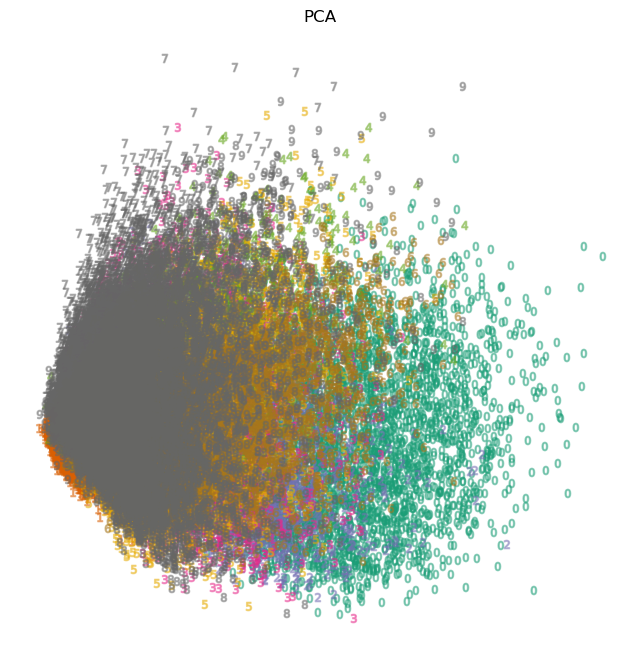

In [89]:
plot_embedding(X_reduced, "PCA")

Visualizando los digitos, ¿Cuáles son los que más se parecen entre ellos? Especula en que cantidad de clusters sería posible agrupar a los digitos, fuera de un cluster por cada uno. (3 puntos)

RESPUESTA:

Visualizando el grafico, podemos verificar que los datos mas 'parecidos' son los que se encuentran mas cerca, como por ejemplo el 5 y 6. Mientras que los datos mas distitnos, son los que se encuentran mas lejanos, como el 1 y 0. En base a lo anterior podemos armar una secuencia aproximada de los datos mas parecidos a los mas distintos. Por ejemplo: 
$$ 1, 9, 4, 7, 8, 6, 5, 3, 2, 0 $$

Podriamos especular que existira una cantidad de 4 clusters, ya que en base al grafico, podemos agrupar los siguientes digitos:  
* 1, 4, 7, 8, 9
* 6, 5
* 2, 3
* 0 



# 3.2 Retención Varianza (4 puntos)

Encuentre el numero mínimo de componentes para usar en PCA de tal manera que se mantenga un 75% de varianza. (4 puntos)

RESPUESTA:

In [99]:
pca_2 = PCA(0.75, whiten=True) # Componentes con 75% de varianza retenida
X_pca = pca_2.fit_transform(X_scaled)
X_pca.shape # Obtenemos que el minimo de componentes son 117 para retener el 75% de varianza

(42000, 117)

# 3.3 Funcion clusterize (5 puntos)

Codifica una función que utiliza el modelo `GaussianMixture` de sklearn para separar a los digitos en `n` grupos. Debe retornar un dataframe que contenga la clasificación. Corre el método con `n=10`. (5 puntos)

RESPUESTA:

In [117]:
def clusterize(X, digits, y, n):
    gmm = GaussianMixture(n, covariance_type='tied')
    gmm.fit(X)
    digits['classification'] = gmm.predict(X)
    digits['label'] = y
    return digits

In [118]:
df_classificated =  clusterize(X_pca, digits, y, 10)

In [115]:
df_classificated[['label', 'classification']]

,label,classification
0,1,4
1,0,4
2,1,4
3,4,4
4,0,4
...,...,...
41995,0,4
41996,1,4
41997,7,7
41998,6,4


# 3.4 Preguntas con GMM (5 puntos)

#### 1. Dado cada cluster, ¿Se puede decir que GMM logro agrupar de forma correcta los distintos digitos? (2.5 puntos)

RESPUESTA:

#### 2. ¿Existe algún(os) digito que se encuentre repartido en mas de 2 clusters? ¿Cuáles? (2.5 puntos)

RESPUESTA:

# 3.5 Evaluación modelo GMM (5 puntos)

Determine el dígito predominante de cada cluster según el número que más se repita por grupo. Con este digito determinado, calcule la precisión de cada dígito al ser clasificado. (5 puntos)

RESPUESTA:

# 3.6 Agrupación de Dígitos similares (3 puntos)

Corre la función clusterize pero ahora solamente con `4` grupos. Registra las nuevas clasificaciones en un dataframe. (3 puntos)

RESPUESTA:

Identifica los digitos que se agruparon en cada cluster y explica la razón de por cual el algoritmo GMM los podría haber agrupado de esa manera.

RESPUESTA:

# Parte 4: KNN (12 puntos)

## 4.1 Separar train y test (4 puntos)

Toma en cuenta el dataset retornado al correr la función clusterize con `n=10`.
Separa el conjunto de datos en train (75%) y test (25%).
Utiliza el ***cluster*** al cual pertenece cada dato como variable de respuesta (y). También determina e imprime la cantidad de datos por cada cluster.

RESPUESTA:

## 4.2 Determina el número óptimo de vecinos con KNeighborsClassifier. (4 puntos)
Los valores a probar son: 1, 5, 8 y 10. Utiliza la métrica score para justificar tu elección.

RESPUESTA:

## 4.3 Evalua el mejor clasificador de 4.2. (4 puntos)
 Comenta al respecto en el contexto del dataset acerca del rendimiento por cada cluster del mejor clasificador encontrado.

RESPUESTA: